In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
# plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/xusy/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure6/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'


In [ ]:
starve = pd.read_csv('/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
starve = starve.set_index('Day')
starvePerc = starve/starve.iloc[1,:]

In [ ]:
starve

,R50H05>Chr,W;R50H05,Trh>Chr,W;Trh,W;Chr,Trh>VNC-Chr,W;VNC-Chr,Trh>ACR1
Day,,,,,,,,
0,50,25,87,25,40,49,24,15
1,50,25,87,25,40,49,24,15
2,22,20,73,25,38,48,24,12
3,0,2,5,13,6,37,14,3
4,0,0,0,0,0,14,1,0
5,0,0,0,0,0,0,0,0


ModuleNotFoundError: No module named 'sksurv'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<matplotlib.legend.Legend>

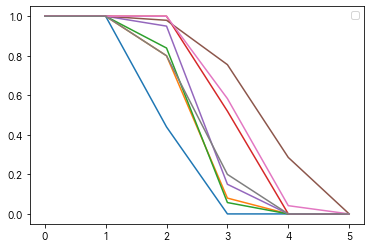

In [ ]:
plt.plot(starvePerc)
plt.legend()

In [ ]:
starve1 = pd.read_csv('/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
df = pd.melt(starve1, id_vars=['Day'], value_vars= starve1.columns[1::], value_name='count', var_name = 'genotype')
df['total'] = [df.loc[df['genotype'] == df.iloc[n]['genotype']]['count'].max() for n in range(len(df))]
df1 = pd.DataFrame(np.nan, index=df.index, columns=np.arange(0, df.total.max(), 1))
for i in range(len(df1)):
    success = df.iloc[i]['count']
    total = df.iloc[i]['total']
    binString = np.zeros(total)
    binString[0:success] = 1
    df1.iloc[i, 0:total] = binString
df_t = pd.concat([df, df1], axis = 1)
df_t_melt = pd.melt(df_t, id_vars = df.columns, value_vars = df1.columns, value_name = 'success').rename(columns = {'variable': 'ID'})
df_t_melt['genotype_day'] = df_t_melt['genotype']+ '_'+df_t_melt['Day'].astype('str')
df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()

/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_2518/4210696965.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()


In [ ]:
df_t_melt_pivot

genotype_day,ID,R50H05>Chr_0,R50H05>Chr_1,R50H05>Chr_2,R50H05>Chr_3,R50H05>Chr_4,R50H05>Chr_5,Trh>ACR1_0,Trh>ACR1_1,Trh>ACR1_2,...,W;Trh_2,W;Trh_3,W;Trh_4,W;Trh_5,W;VNC-Chr_0,W;VNC-Chr_1,W;VNC-Chr_2,W;VNC-Chr_3,W;VNC-Chr_4,W;VNC-Chr_5
0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[<matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>]

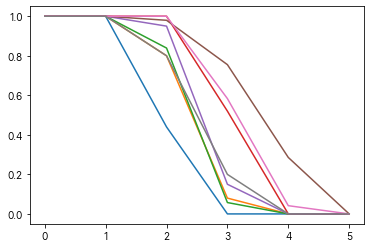

In [ ]:
df_std = df_t_melt_pivot.std()
df_std
starvePerc_ste = starvePerc.copy()
starvePerc_std = starvePerc.copy()
for i in range(6):
    for j in starvePerc.columns:
        starvePerc_std.loc[i, j] = (df_std[j+'_'+str(i)])
        starvePerc_ste.loc[i, j] = (df_std[j+'_'+str(i)])/np.sqrt(starve.loc[0][j])
        
starvePerc_ste
plt.plot(starvePerc)



/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_2518/494317686.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_2518/494317686.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
/var/folders/kq/4l8hqns14tq268_3hslhmf8w_wkd22/T/ipykernel_2518/494317686.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )


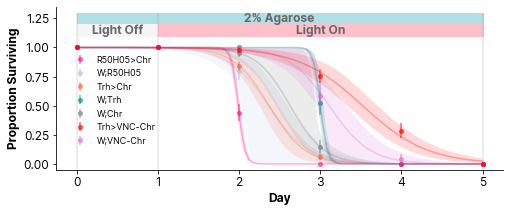

In [ ]:
setFont('inter', 12)

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in range(7):
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in range(7):
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve.svg', bbox_inches = 'tight')
# plt.savefig(figurepath+'/images/starvecurve.svg')


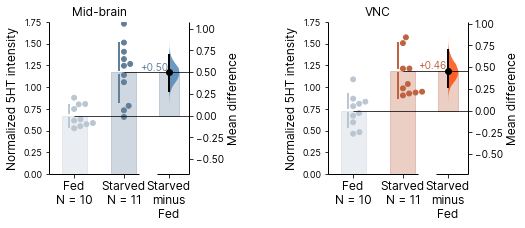

In [ ]:
import dabest
import pandas
setFont('inter', 9)
f, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(7.5, 2.8),
                      gridspec_kw={'wspace': 1, 'hspace': .5} # ensure proper width-wise spacing.
                     )
fedstarved = pd.read_csv('/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/Fed_Starved.csv',delimiter=',')
fedstarved.columns
setFont('inter', 10)

brain = fedstarved.loc[fedstarved['Region']== 'Brain']
brain_nc82_contrast = dabest.load(brain, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
brain_nc82_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 1.75], ax = axes[0], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'steelblue'},
                                  es_marker_size = 6);


vnc = fedstarved.loc[fedstarved['Region']== 'VNC']
vnc_nc82_contrast = dabest.load(vnc, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
vnc_nc82_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 1.75], ax = axes[1], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'orangered'},
                                  es_marker_size = 6);
vnc_5ht_contrast = dabest.load(vnc, x = 'Starvation', y = '5HT Intensity', idx = ('Fed', 'Starved'))
titles = ['Mid-brain','VNC']

for i in range(len(axes.flatten())):
    axes.flatten()[i].set_title(titles[i], ha = 'center')
f.savefig(figurepath+'/images/5htnorm.png', dpi = 300)
f.savefig(figurepath+'/images/5htnorm.svg')



# RNAi Data

In [ ]:
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}

for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = 'Status')
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    fullMetaData.iloc[i, -3] = data['Starvation'][0]
    fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
    fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])

fullMetaData


,Expt,File,Group,Delta Type,Starved Hours,State,Test Sample Size
0,TrhTrhi,TrhTrhi_ele.csv,RNAi,delta,0,Fed,30.0
1,TrhGluti,TrhGluti_ele.csv,RNAi,delta,0,Fed,36.0
2,TrhSut2i,TrhSut2i_ele.csv,RNAi,delta,0,Fed,28.0
3,TrhVTrhi,TrhVTrhi_ele.csv,RNAi,delta,0,Fed,36.0
4,TrhVGluti,TrhVGluti_ele.csv,RNAi,delta,0,Fed,28.0
5,TrhVSut2i,TrhVSut2i_ele.csv,RNAi,delta,0,Fed,53.0


/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/plot_tools.py:1912: UserWarning: 3.3% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/xusy/opt/anaconda3/envs/dabesttest/lib/python3.9/site-packages/dabest/plot_tools.py:1912: UserWarning: 28.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


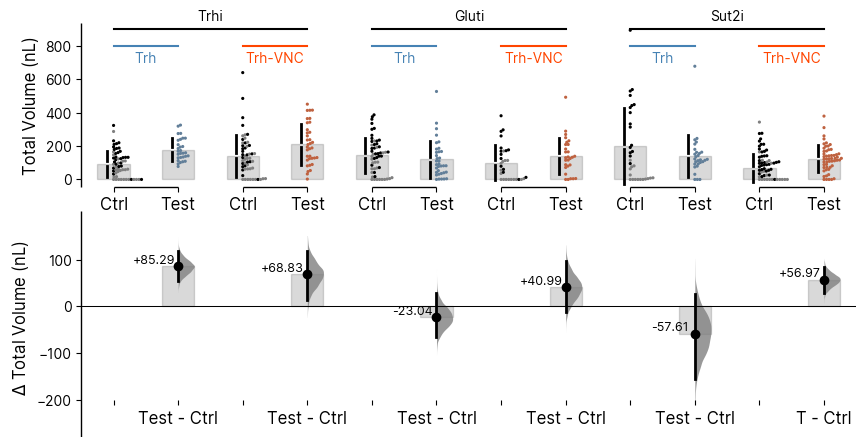

In [ ]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
rnaidata = []
for i in fullMetaData.index:
    data = dataDict[fullMetaData.iloc[i, 0]]
    data['Expt'] = fullMetaData.loc[i, 'Expt']
    rnaidata.append(data)
rnaidf = pd.concat(rnaidata)
rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt']
rnaidf['StatusExpt'].unique()
rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
rnaidf['Volume'] = rnaidf['Volume'] *1000
rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'UAS/W', 'w1118; trh-gal4':'Trh-Gal4/W', 'trh-gal4>uas-trhi':'Trh-Gal4>RNAi',
       'w1118; uas-gluti40904':'UAS/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>RNAi',
       'w1118; uas-sut2rnai':'UAS/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>RNAi',
       'w1118; trhvnc-gal4':'TrhVNC-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'TrhVNC-Gal4>RNAi',
       'trhvnc-gal4<uas-gluti40904':'TrhVNC-Gal4>RNAi', 'trh-vnc-gal4>uas-sut2rnai':'TrhVNC-Gal4>RNAi'})
idx  = (('Ctrl_TrhTrhi', 'Test_TrhTrhi'), ('Ctrl_TrhVTrhi', 'Test_TrhVTrhi'), 
        ('Ctrl_TrhGluti', 'Test_TrhGluti'),('Ctrl_TrhVGluti', 'Test_TrhVGluti'),
       ('Ctrl_TrhSut2i', 'Test_TrhSut2i'),  ('Ctrl_TrhVSut2i',
       'Test_TrhVSut2i'))
rnaipalette = {'Ctrl_TrhTrhi':'gray', 'Test_TrhTrhi':'steelblue', 'Ctrl_TrhVTrhi':'gray', 'Test_TrhVTrhi':'orangered',
               'Ctrl_TrhGluti':'gray', 'Test_TrhGluti':'steelblue', 'Ctrl_TrhVGluti':'gray', 'Test_TrhVGluti':'orangered', 
       'Ctrl_TrhSut2i':'gray', 'Test_TrhSut2i':'steelblue', 'Ctrl_TrhVSut2i':'gray', 'Test_TrhVSut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'UAS/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'TrhVNC-Gal4/W':'k', 'TrhVNC-Gal4>RNAi':'orangered',}
rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(color_col = 'GenoReduced', fig_size=(10, 5), custom_palette= rnaigenoreducedpalette, delta_text_kwargs =dt_kwargs, contrast_bars_kwargs= cb_kwargs, swarm_bars_kwargs= sb_kwargs, raw_marker_size=rm_size,   es_marker_size= es_size,)
frnaiC.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels(['', 'Test - Ctrl', '', 'Test - Ctrl', '', 'Test - Ctrl','', 'Test - Ctrl', '', 'Test - Ctrl','', 'T - Ctrl',])
frnaiC.axes[0].plot([0, 1], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([4, 5], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([6, 7], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([8, 9], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([10, 11], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [900, 900], color = 'k')
frnaiC.axes[0].plot([4, 7], [900, 900], color = 'k')
frnaiC.axes[0].plot([8, 11], [900, 900], color = 'k')
frnaiC.axes[0].text(.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(2.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(4.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(6.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(8.5, 700, 'Trh', ha =  'center', color = 'steelblue')
frnaiC.axes[0].text(10.5, 700, 'Trh-VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 950, 'Trhi', ha =  'center', color = 'k')
frnaiC.axes[0].text(5.5, 950, 'Gluti', ha =  'center', color = 'k')
frnaiC.axes[0].text(9.5, 950, 'Sut2i', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Total Volume (nL)')
frnaiC.axes[1].set_ylim(-200, 150)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/images/RNAi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/images/RNAi.png', dpi = 300, bbox_inches='tight')

##### 

In [ ]:
from svgutils.compose import *

Figure("16cm", "20cm", 
    Panel(SVG(figurepath +'/images/starvecurve.svg').scale(0.016),
    Text("a", 0, .2, size=0.4, font = 'Inter', weight='bold'),).move(0, .5),
    Panel(SVG(figurepath +'/images/KMCurve.svg').scale(0.018),
    Text("b", 0, .2, size=0.4, font = 'Inter', weight='bold'),).move(8.8, .5),
    Panel(SVG(figurepath +'/images/5htnorm.svg').scale(0.016),
    Text("c", 0, .2, size=0.4, font = 'inter', weight='bold'), 
    Text("d", 4.5, .2, size=0.4, font = 'inter', weight='bold')).move(0, 3.8),
    Panel(SVG(figurepath +'/images/brainsimple.svg').scale(0.0015)).move(1.3, 4.1),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(5.6, 4.1),
    Panel(SVG(figurepath +'/images/RNAi.svg').scale(0.023),
    Text("e", 0, .2, size=0.4, font = 'inter', weight='bold')).move(0, 7.5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15, 8.6),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95 + 2.15*2, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15*3, 8.6),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1.95 + 2.15*4, 8.6),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1.95 + 2.15*5, 8.6),
    Panel(SVG(figurepath +'/fig6Summary.svg').scale(0.026),
    Text("f", 0, .2, size=0.4, font = 'inter', weight='bold'), ).move(0, 15),
).save(figurepath + "Figure6_alt.svg")








